# Pandas Homework, Part One: Lots and lots of questions about beer

James Wilde

6/19/25

### Do your importing and your setup

In [1]:
import pandas as pd
import re
import numpy as np

## Read in the file `craftcans.csv`, and look at the first first rows

In [2]:
df = pd.read_csv("craftcans.csv", na_values=["Does not apply"])

## How many rows do you have in the data? What are the column types?

In [3]:
df.head(10)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0
5,Parapet ESB,NorthGate Brewing,"Minneapolis, MN",Extra Special / Strong Bitter (ESB),16 oz.,5.60%,47.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00%,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.50%,80.0
8,35 K,Against the Grain Brewery,"Louisville, KY",Milk / Sweet Stout,16 oz.,7.70%,25.0
9,A Beer,Against the Grain Brewery,"Louisville, KY",American Pale Ale (APA),16 oz.,4.20%,42.0


In [4]:
df.shape

(2416, 7)

Looks like 2416 rows and 7 columns! Looks like each row is a can of beer.

In [5]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

The columns mostly have the data type of "object." Looking at the data, those are probably all strings. 

# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [6]:
df.value_counts(['Brewery']).sort_values(ascending=False).head(10)

Brewery                   
Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
SanTan Brewing Company        19
Name: count, dtype: int64

Those are the 10 breweries with the most cans of beer in this dataset. (Note: each can of beer is not necessarily a unique flavor.)

## What is the most common ABV? (alcohol by volume)

In [7]:
df.value_counts(['ABV']).sort_values(ascending=False).head()

ABV  
5.00%    215
5.50%    158
6.00%    125
6.50%    123
5.20%    107
Name: count, dtype: int64

Looks like 5.00% is the most common ABV.

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [8]:
df['ABV']

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [9]:
df["ABV"] = df["ABV"].str.replace('%', '', regex=False)

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [10]:
df["ABV"] = df["ABV"].astype(float)

df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs        float64
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [11]:
df['ABV'].describe()

count    2348.000000
mean        5.977342
std         1.354173
min         0.100000
25%         5.000000
50%         5.600000
75%         6.700000
max        12.800000
Name: ABV, dtype: float64

(Note that the 50th percentile value is equal to the median.)

<Axes: >

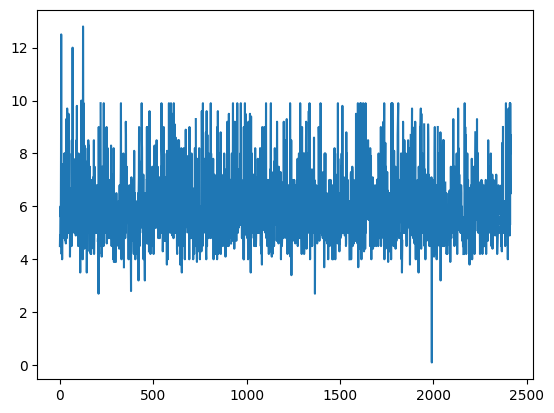

In [12]:
df['ABV'].plot()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: What does `.sum()` do when you have trues and falses? What about `.value_counts()`?*

In [13]:
df['ABV'].isnull().value_counts()

ABV
False    2348
True       68
Name: count, dtype: int64

So we have 68 null ABV values.

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [14]:
df['Location'].value_counts().sort_values(ascending=False).head(10)

Location
Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: count, dtype: int64

In [15]:
df.head(10)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25.0
5,Parapet ESB,NorthGate Brewing,"Minneapolis, MN",Extra Special / Strong Bitter (ESB),16 oz.,5.6,47.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0
8,35 K,Against the Grain Brewery,"Louisville, KY",Milk / Sweet Stout,16 oz.,7.7,25.0
9,A Beer,Against the Grain Brewery,"Louisville, KY",American Pale Ale (APA),16 oz.,4.2,42.0


## List all of the beer from Brooklyn, NY

In [16]:
df.query("Location == 'Brooklyn, NY'")

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most different cans of beer?

In [17]:
# This is getting long, so I'm spreading this out over multiple lines

(
df
 .query("Location == 'Brooklyn, NY'")
 .value_counts(['Brewery'])
 .sort_values(ascending=False)
 .head()
)

Brewery            
Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: count, dtype: int64

Sixpoint Craft Ales has 24 cans of beer in this dataset!

## What are the five most common styles of beer produced by Sixpoint?

In [18]:
(
df
 .query("Brewery == 'Sixpoint Craft Ales'")
 .value_counts(['Style'])
 .sort_values(ascending=False)
 .head(5)
)

Style                         
American IPA                      4
American Double / Imperial IPA    2
Baltic Porter                     2
Cream Ale                         2
German Pilsener                   2
Name: count, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*
- *Tip: If you want to be extra fancy, you can create a new column with just the state abbreviation and then filter on that.*

In [19]:
df["Location"].isna().value_counts()

Location
False    2410
True        6
Name: count, dtype: int64

So we have 6 rows with null location values.

In [20]:
df['State'] = df["Location"].str.split(",").str[1].str.strip()

df.head(10)

,Beer,Brewery,Location,Style,Size,ABV,IBUs,State
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0,MN
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26.0,MN
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0,MN
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38.0,MN
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25.0,MN
5,Parapet ESB,NorthGate Brewing,"Minneapolis, MN",Extra Special / Strong Bitter (ESB),16 oz.,5.6,47.0,MN
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0,KY
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0,KY
8,35 K,Against the Grain Brewery,"Louisville, KY",Milk / Sweet Stout,16 oz.,7.7,25.0,KY
9,A Beer,Against the Grain Brewery,"Louisville, KY",American Pale Ale (APA),16 oz.,4.2,42.0,KY


In [21]:
df[df['State'] == 'NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs,State
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0,NY
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0,NY
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN,NY
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN,NY
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0,NY
...,...,...,...,...,...,...,...,...
2351,Brooklyn Lager (12 oz.),Brooklyn Brewery,"Brooklyn, NY",American Amber / Red Lager,12 oz.,5.2,NaN,NY
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.9,NaN,NY
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.8,NaN,NY
2366,Moo Thunder Stout,Butternuts Beer and Ale,"Garrattsville, NY",Milk / Sweet Stout,12 oz.,4.9,NaN,NY


### Now *count* all of the breweries in New York state

In [22]:
df[df['State'] == 'NY']['Brewery'].nunique()


16

Looks like 16 unique breweries in New York state.

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [23]:
df[df['Style'].str.contains("IPA", na=False)]['Style']


0                         American IPA
6       American Double / Imperial IPA
14      American Double / Imperial IPA
17                        American IPA
24      American Double / Imperial IPA
                     ...              
2403    American Double / Imperial IPA
2406                      American IPA
2408                      American IPA
2412    American Double / Imperial IPA
2414    American Double / Imperial IPA
Name: Style, Length: 571, dtype: object

IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [24]:
# df['IBUs'].mean()

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values=`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values=` a LIST, not just a string*

### Now try to get the average IBUs again

Note: I added "Does not apply" as a null value in the initial csv read in!

In [25]:
df['IBUs'].mean()

42.71316725978647

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

<Axes: >

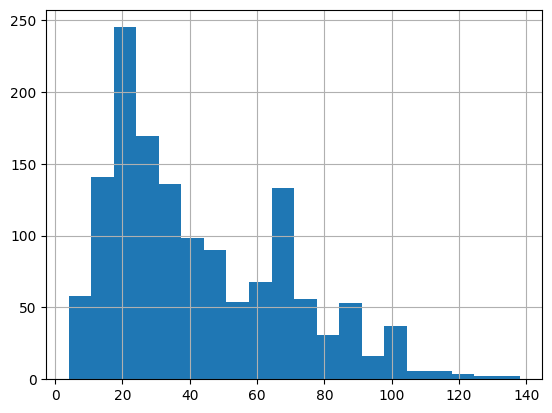

In [26]:
df['IBUs'].hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single command that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [28]:
df['IBUs'].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

The 75th percentile == 64 IBUs.

In [29]:
df[df['IBUs'] > 64]

,Beer,Brewery,Location,Style,Size,ABV,IBUs,State
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0,KY
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0,KY
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0,KY
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0,KY
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0,MA
...,...,...,...,...,...,...,...,...
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0,CA
2410,Ten Fidy Imperial Stout,Oskar Blues Brewery,"Longmont, CO",Russian Imperial Stout,12 oz.,9.9,98.0,CO
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0,CO
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85.0,CO


## List all of the beers with IBUs below the 25th percentile

25th percentile == 21.

In [30]:
df[df['IBUs'] < 21]

,Beer,Brewery,Location,Style,Size,ABV,IBUs,State
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0,MN
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.0,13.0,KY
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.5,17.0,KY
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.0,20.0,KY
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.2,18.0,MA
...,...,...,...,...,...,...,...,...
2372,Bombshell Blonde,Southern Star Brewing Company,"Conroe, TX",American Blonde Ale,12 oz.,5.0,20.0,TX
2385,Bikini Blonde Lager,Maui Brewing Company,"Lahaina, HI",Munich Helles Lager,12 oz.,4.5,18.0,HI
2396,Royal Weisse Ale,Sly Fox Brewing Company,"Pottstown, PA",Hefeweizen,12 oz.,5.6,11.0,PA
2404,Hell,Surly Brewing Company,"Brooklyn Center, MN",Keller Bier / Zwickel Bier,16 oz.,5.1,20.0,MN


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

<Axes: ylabel='Style'>

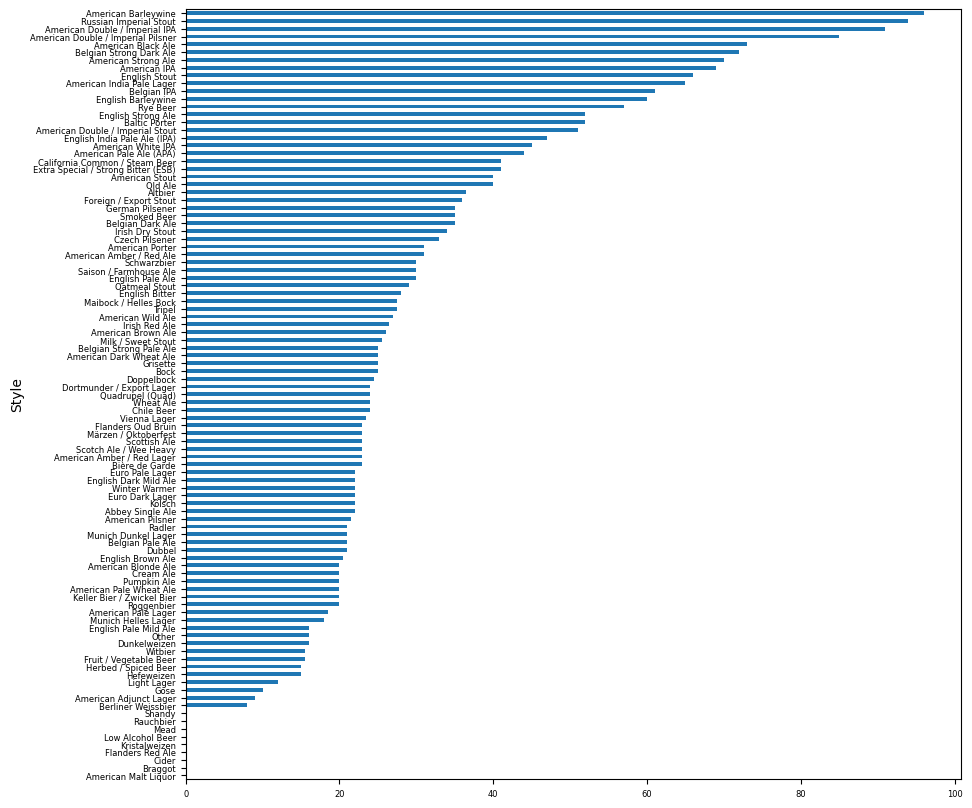

In [54]:
(
    df
    .groupby('Style')['IBUs']
    .median()
    .sort_values(ascending=True, na_position='first')
    .plot(kind='barh', fontsize=6, figsize=(10, 10))
)

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

**Top 5 most common high-IBU beers:**

In [56]:
(
    df
    .query("IBUs > 64")
    .value_counts("Style")
    .sort_values(ascending=False)
    .head(5)
)

Style
American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: count, dtype: int64

**Top 5 most common low-IBU beers:**

In [57]:
(
    df
    .query("IBUs < 21")
    .value_counts("Style")
    .sort_values(ascending=False)
    .head(5)
)

Style
American Pale Wheat Ale    43
American Blonde Ale        36
Fruit / Vegetable Beer     28
Hefeweizen                 21
Witbier                    20
Name: count, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [65]:
df[df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])]['IBUs'].mean()




18.982142857142858

## Draw a histogram of the IBUs of those beers

<Axes: >

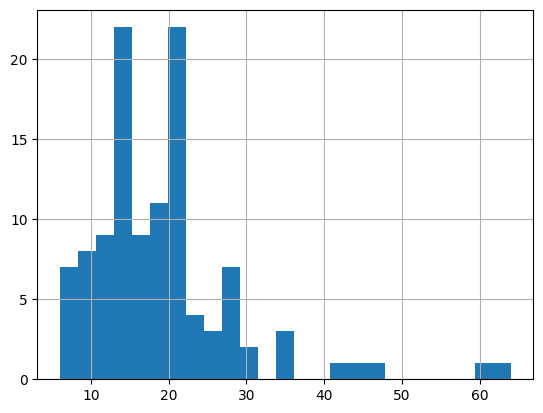

In [66]:
df[df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])]['IBUs'].hist(bins=25)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [74]:
df[df['Style'].str.contains("IPA", na=False)]['IBUs'].mean()

71.94897959183673

<Axes: >

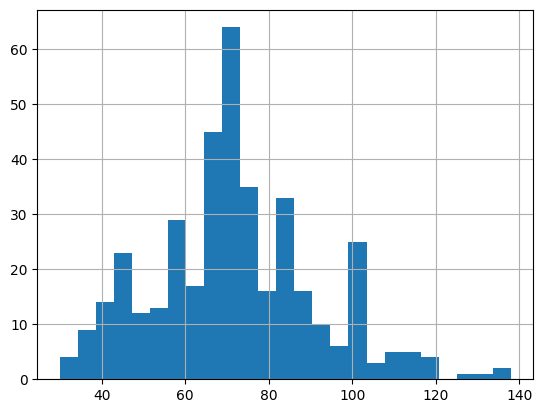

In [75]:
df[df['Style'].str.contains("IPA", na=False)]['IBUs'].hist(bins=25)

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

<Axes: >

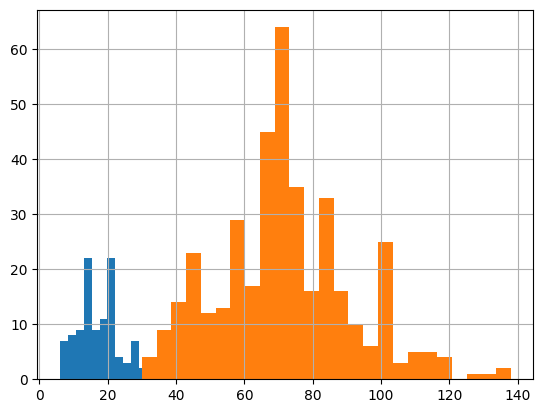

In [77]:
df[df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])]['IBUs'].hist(bins=25)

df[df['Style'].str.contains("IPA", na=False)]['IBUs'].hist(bins=25)

Well that's interesting!

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [78]:
df[df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])]['ABV'].mean()

5.043715846994536

In [79]:
df[df['Style'].str.contains("IPA", na=False)]['ABV'].mean()

6.879285714285714

OK, IPAs have a higher average ABV than the wheat beers.

<Axes: >

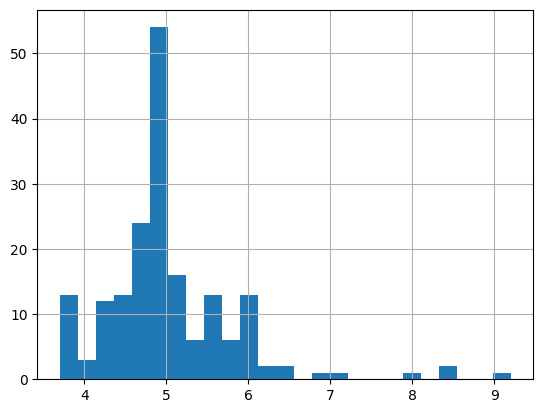

In [80]:
df[df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])]['ABV'].hist(bins=25)

<Axes: >

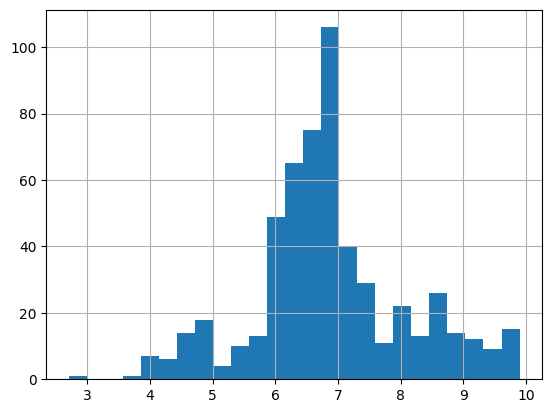

In [81]:
df[df['Style'].str.contains("IPA", na=False)]['ABV'].hist(bins=25)

Looks like IPAs generally have higher ABVs when looking at the distributions as well.

## Good work!

Thank you, I live to serve and do homework.